In [ ]:
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.colors import ListedColormap

data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data)

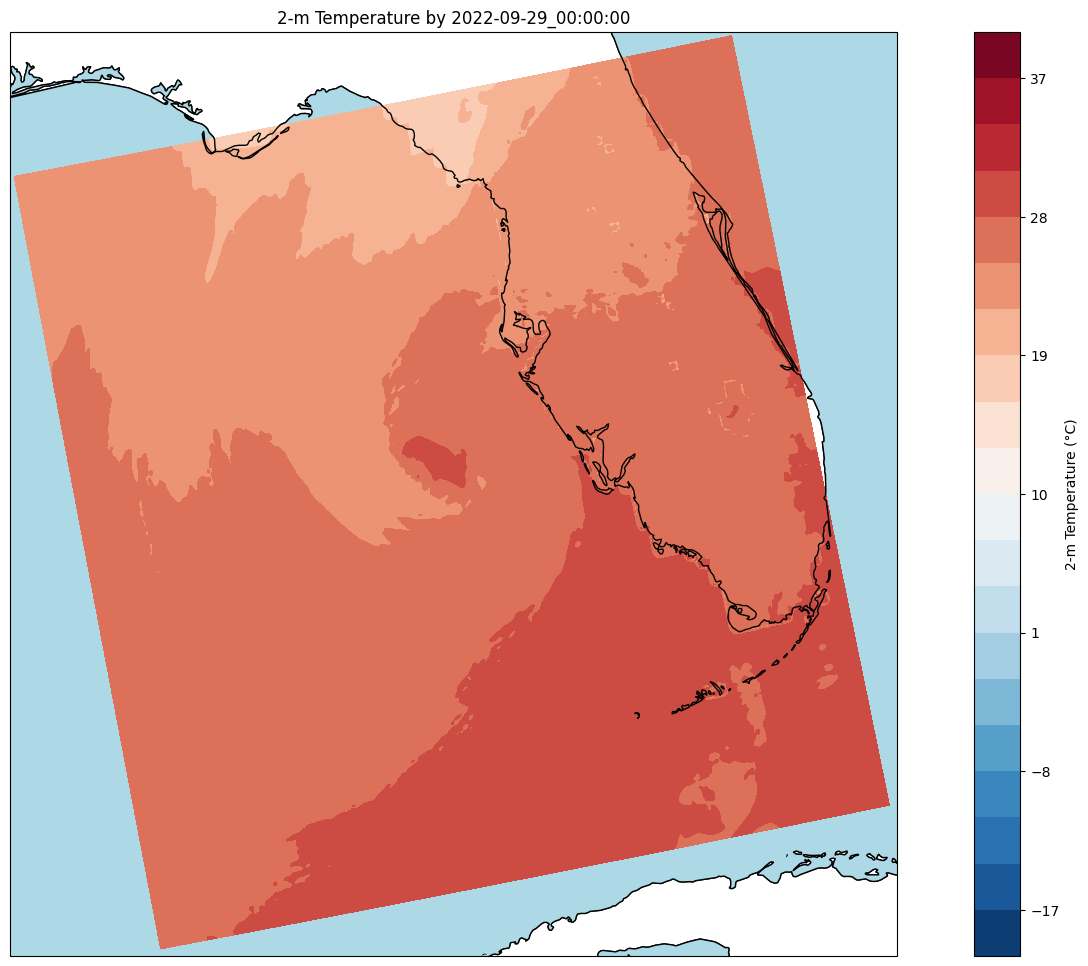

In [18]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
dataset = nc.Dataset(data, 'r')

# Extract coordinates
xlat = dataset.variables['XLAT'][-1, :, :]  # [south_north, west_east]
xlong = dataset.variables['XLONG'][-1, :, :]  # [south_north, west_east]

# Extract and convert Times to strings
times = dataset.variables['Times'][:]  # [Time, DateStrLen]
times_str = []
for time in times:
    # Handle byte characters and potential masking
    time_chars = [char.decode('utf-8') if isinstance(char, bytes) else str(char)
                  for char in time if not np.ma.is_masked(char)]
    time_str = ''.join(time_chars).strip().rstrip('\x00')  # Remove padding/null characters
    times_str.append(time_str)

# Extract T2 at the last timestep
t2 = dataset.variables['T2'][-1, :, :] - 273.15  # Convert to Celsius

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, t2, transform=ccrs.PlateCarree(),
                      cmap='RdBu_r', levels=np.linspace(-20, 40, 21))  # Adjust levels as needed
plt.colorbar(contour, label='2-m Temperature (°C)')
plt.title(f'2-m Temperature by {times_str[-1]}')
plt.show()

dataset.close()

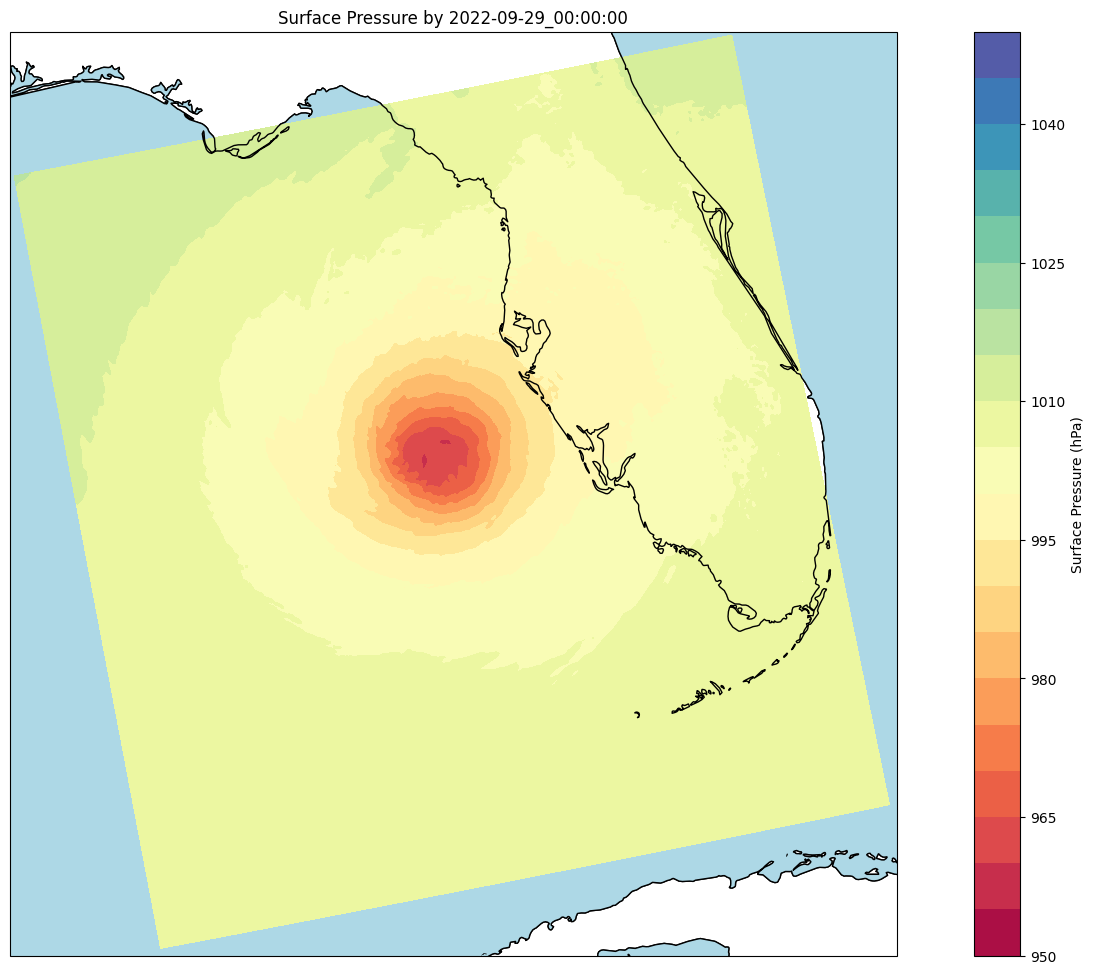

In [21]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data, 'r')

# Extract coordinates and Times
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(char.decode('utf-8') if isinstance(char, bytes) else str(char)
                     for char in time if not np.ma.is_masked(char)).strip().rstrip('\x00')
             for time in times]

# Extract PSFC at the last timestep
psfc = dataset.variables['PSFC'][-1, :, :] / 100  # Convert to hPa

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, psfc, transform=ccrs.PlateCarree(),
                      cmap='Spectral', levels=np.linspace(950, 1050, 21))
plt.colorbar(contour, label='Surface Pressure (hPa)')
plt.title(f'Surface Pressure by {times_str[-1]}')
plt.show()

dataset.close()

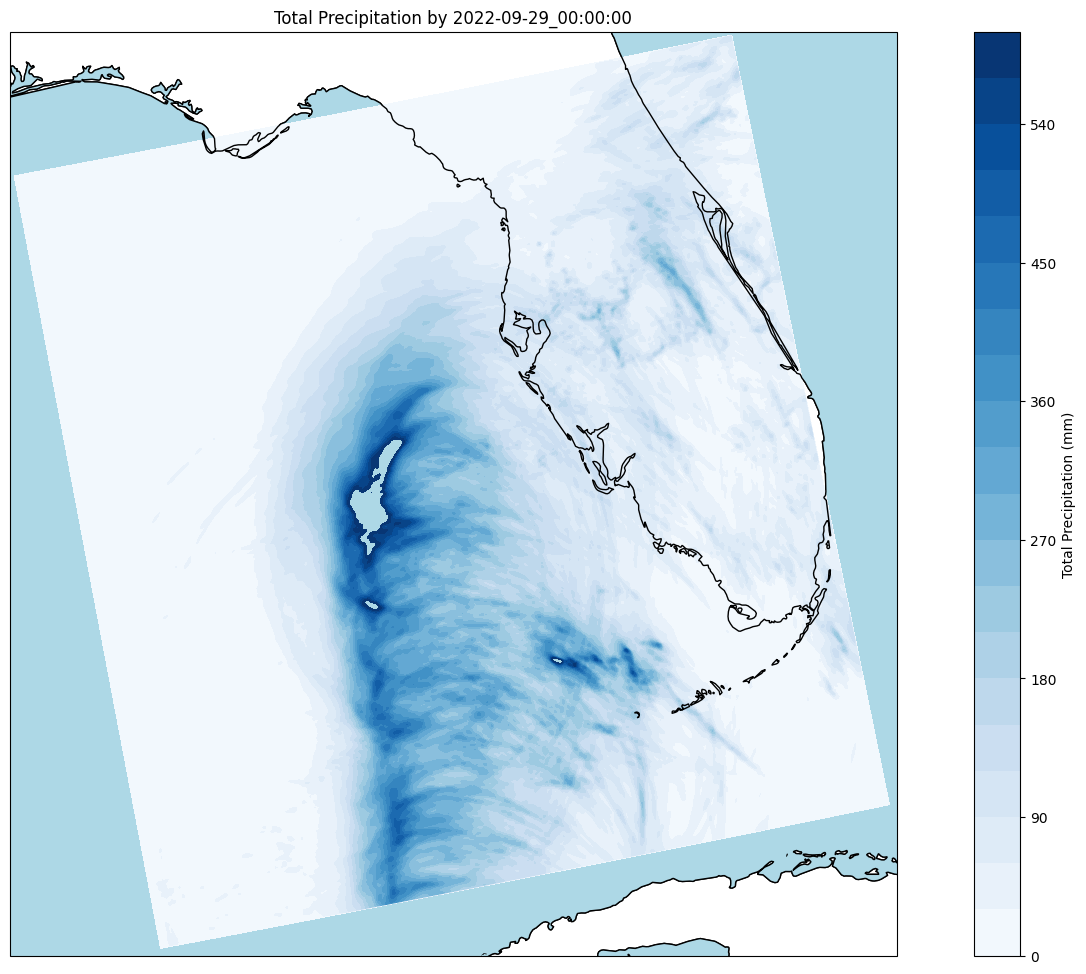

In [22]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data, 'r')

# Extract coordinates and Times
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(char.decode('utf-8') if isinstance(char, bytes) else str(char)
                     for char in time if not np.ma.is_masked(char)).strip().rstrip('\x00')
             for time in times]

# Extract RAINC and RAINNC at the last timestep
rainc = dataset.variables['RAINC'][-1, :, :]
rainnc = dataset.variables['RAINNC'][-1, :, :]
total_precip = rainc + rainnc

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, total_precip, transform=ccrs.PlateCarree(),
                      cmap='Blues', levels=np.linspace(0, 600, 21))  # Adjust levels based on data
plt.colorbar(contour, label='Total Precipitation (mm)')
plt.title(f'Total Precipitation by {times_str[-1]}')
plt.show()

dataset.close()

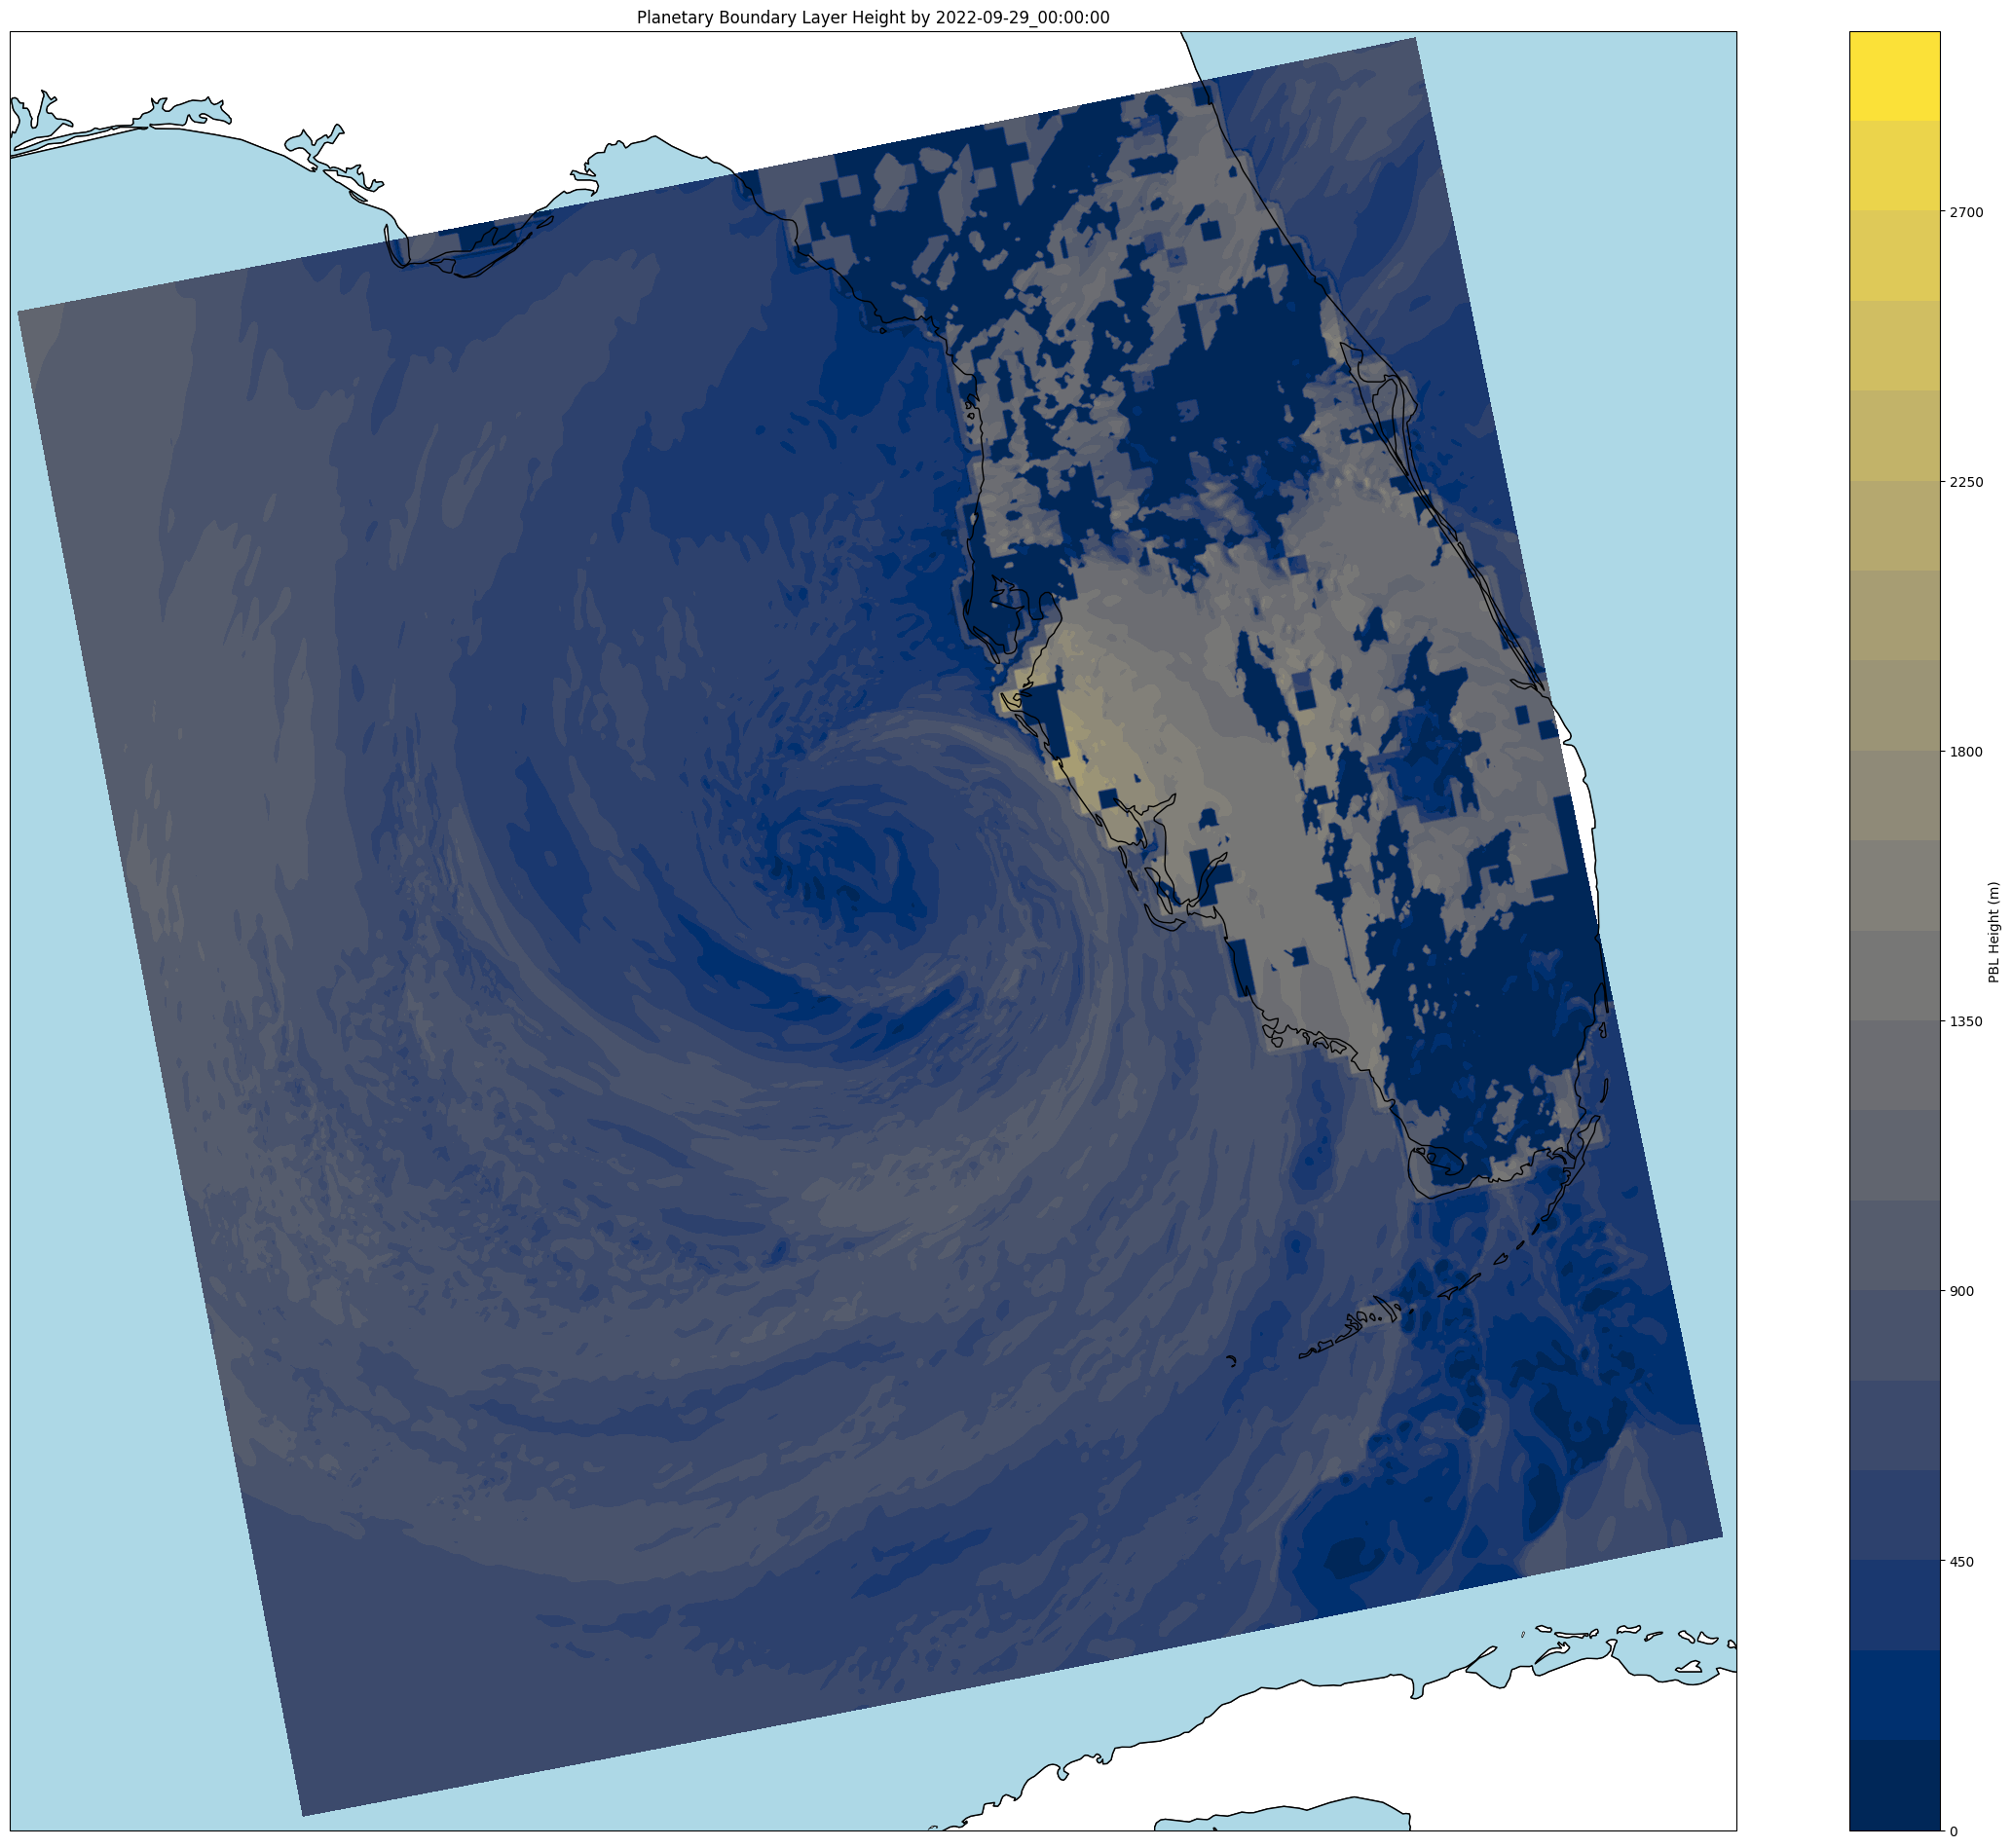

In [96]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data, 'r')


# Choose two colormaps
cmap1 = plt.get_cmap('BuGn', 128)   # 128 colors from Blues
cmap2 = plt.get_cmap('YlGn_r', 128)    # 128 colors from Reds

# Combine them
newcolors = np.vstack((cmap1(np.linspace(0, 1, 128)),
                       cmap2(np.linspace(0, 1, 128))))
combined_cmap = ListedColormap(newcolors, name='BluesReds')

# Test it
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Extract coordinates and Times
xlat = dataset.variables['XLAT'][0, :, :]
xlong = dataset.variables['XLONG'][0, :, :]
times = dataset.variables['Times'][:]
times_str = [''.join(char.decode('utf-8') if isinstance(char, bytes) else str(char)
                     for char in time if not np.ma.is_masked(char)).strip().rstrip('\x00')
             for time in times]

# Extract PBLH at the last timestep
pblh = dataset.variables['PBLH'][-1, :, :]

# Create the plot
fig, ax = plt.subplots(figsize=(30, 24), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

contour = ax.contourf(xlong, xlat, pblh, transform=ccrs.PlateCarree(),
                      cmap='cividis', levels=np.linspace(0, 3000, 21))
plt.colorbar(contour, label='PBL Height (m)')
plt.title(f'Planetary Boundary Layer Height by {times_str[-1]}')
plt.show()

dataset.close()

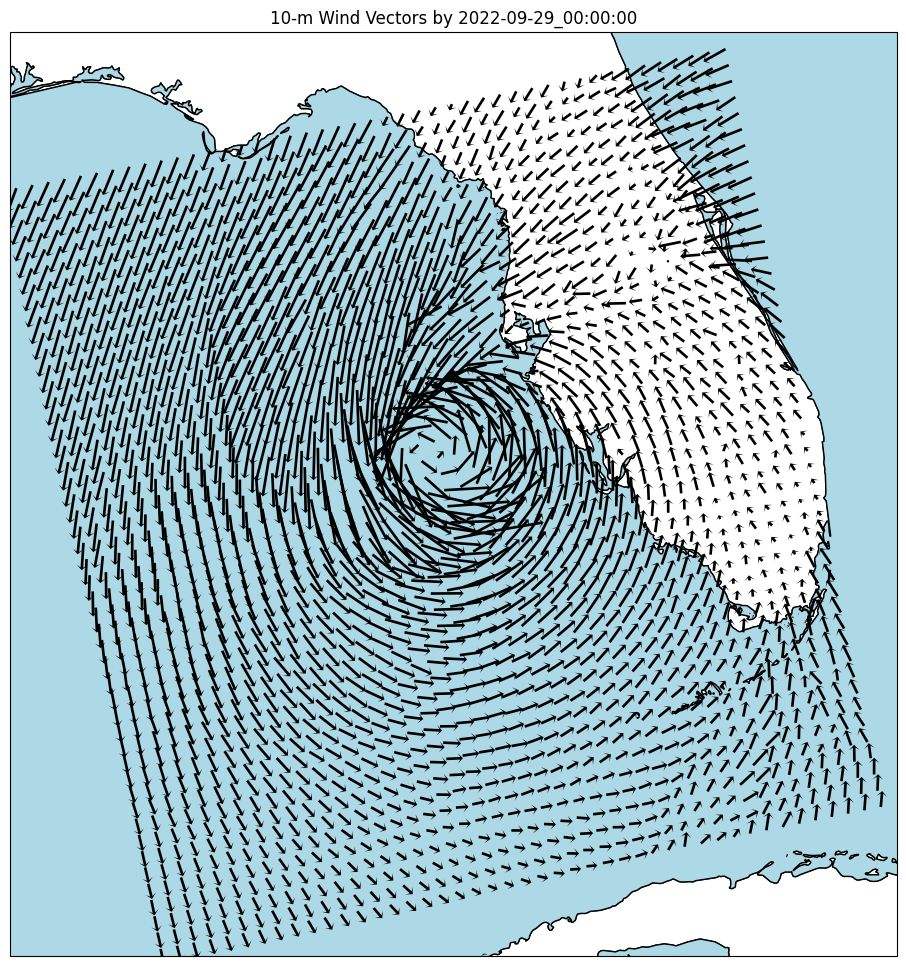

In [69]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data, 'r')

# Extract coordinates and Times
xlat = dataset.variables['XLAT'][0, :, :]  # [south_north, west_east]
xlong = dataset.variables['XLONG'][0, :, :]  # [south_north, west_east]
times = dataset.variables['Times'][:]  # [Time, DateStrLen]
times_str = [''.join(char.decode('utf-8') if isinstance(char, bytes) else str(char)
                     for char in time if not np.ma.is_masked(char)).strip().rstrip('\x00')
             for time in times]

# Extract U10 and V10 at the last timestep
u10 = dataset.variables['U10'][-1, :, :]
v10 = dataset.variables['V10'][-1, :, :]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot wind vectors with adjusted scale to reduce arrow length
quiver = ax.quiver(xlong[::15, ::15], xlat[::15, ::15], u10[::15, ::15], v10[::15, ::15],
                   transform=ccrs.PlateCarree(), scale=600, width=0.003,
                   headwidth=4, headlength=2, headaxislength=1)
ax.quiverkey(quiver, 0.9, 1.05, 10, '10 m/s', labelpos='E')
plt.title(f'10-m Wind Vectors by {times_str[-1]}')
plt.show()

dataset.close()

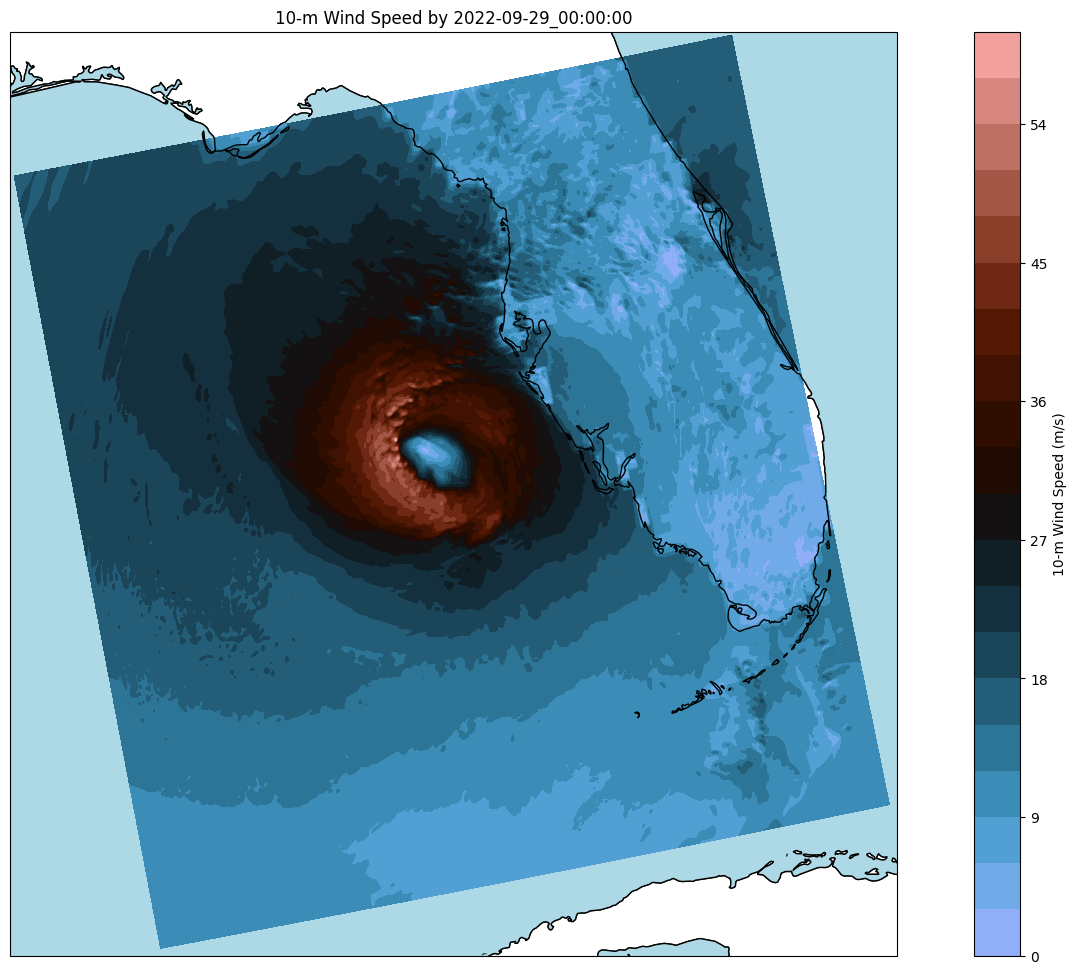

In [90]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data, 'r')

# Extract coordinates and Times
xlat = dataset.variables['XLAT'][0, :, :]  # [south_north, west_east]
xlong = dataset.variables['XLONG'][0, :, :]  # [south_north, west_east]
times = dataset.variables['Times'][:]  # [Time, DateStrLen]
times_str = [''.join(char.decode('utf-8') if isinstance(char, bytes) else str(char)
                     for char in time if not np.ma.is_masked(char)).strip().rstrip('\x00')
             for time in times]

# Extract U10 and V10 at the last timestep
u10 = dataset.variables['U10'][-1, :, :]
v10 = dataset.variables['V10'][-1, :, :]

# Calculate wind speed
wind_speed = np.sqrt(u10**2 + v10**2)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot wind speed as contours
contour = ax.contourf(xlong, xlat, wind_speed, transform=ccrs.PlateCarree(),
                      cmap='berlin', levels=np.linspace(0, 60, 21))
plt.colorbar(contour, label='10-m Wind Speed (m/s)')

plt.title(f'10-m Wind Speed by {times_str[-1]}')
plt.show()

dataset.close()

c:\Users\ustro\anaconda3\envs\coaps-ship\Lib\site-packages\matplotlib\quiver.py:678: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
c:\Users\ustro\anaconda3\envs\coaps-ship\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


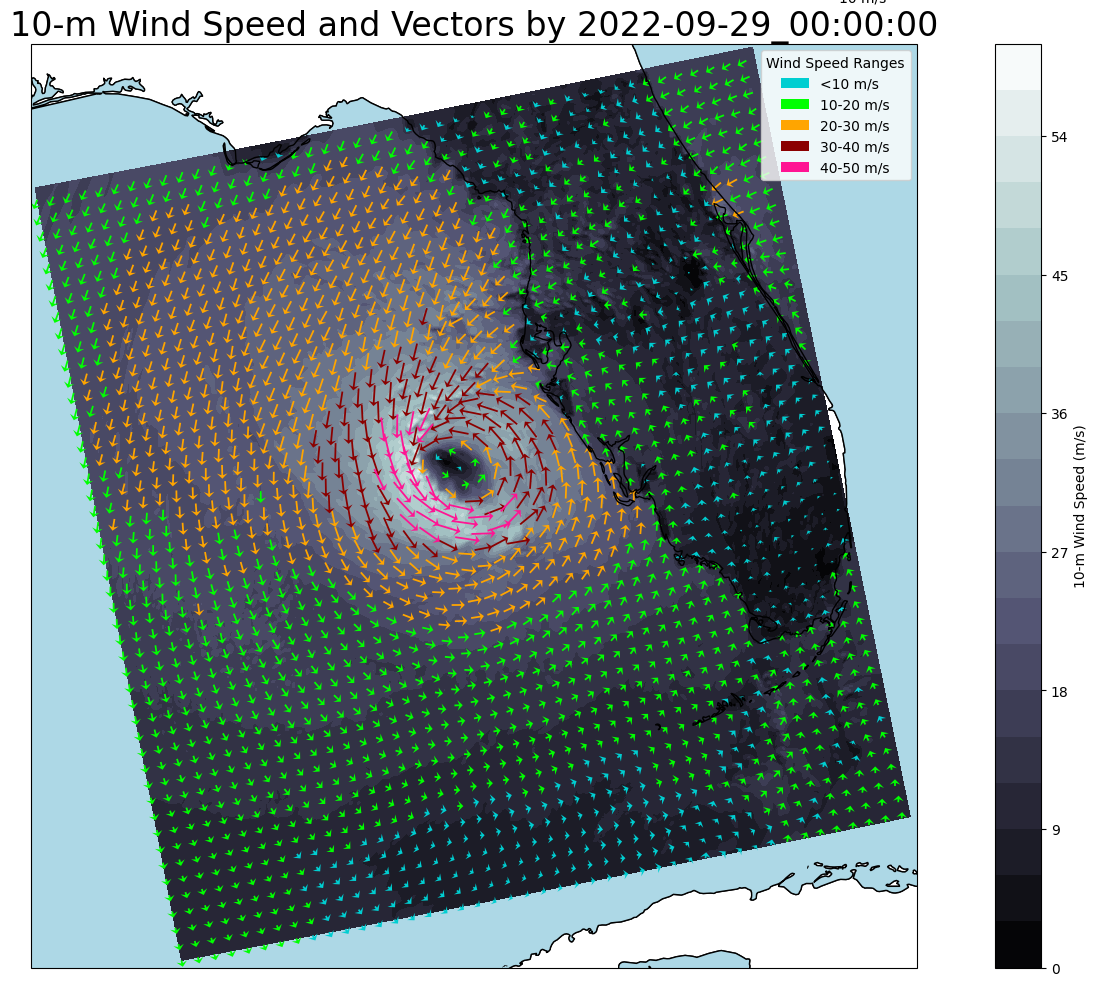

In [97]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the path to your NetCDF file
data = 'data/wrfout_d03_2022-09-26_Ian2022_UNCPL.nc'
dataset = nc.Dataset(data, 'r')

# Extract coordinates and Times
xlat = dataset.variables['XLAT'][0, :, :]  # [south_north, west_east]
xlong = dataset.variables['XLONG'][0, :, :]  # [south_north, west_east]
times = dataset.variables['Times'][:]  # [Time, DateStrLen]
times_str = [''.join(char.decode('utf-8') if isinstance(char, bytes) else str(char)
                     for char in time if not np.ma.is_masked(char)).strip().rstrip('\x00')
             for time in times]

# Extract U10 and V10 at the last timestep
u10 = dataset.variables['U10'][-1, :, :]
v10 = dataset.variables['V10'][-1, :, :]

# Calculate wind speed
wind_speed = np.sqrt(u10**2 + v10**2)

# Define wind speed ranges and corresponding colors
speed_ranges = [
    (0, 10, '#00CED1', '<10 m/s'),    # Teal
    (10, 20, '#00FF00', '10-20 m/s'), # Brighter Green (Lime)
    (20, 30, '#FFA500', '20-30 m/s'), # Orange
    (30, 40, '#8B0000', '30-40 m/s'), # Red
    (40, 50, '#FF1493', '40-50 m/s'), # Hot Pink
    (50, np.inf, '#C71585', '50+ m/s') # Bright Purple
]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.LambertConformal()})
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot wind speed as contours
contour = ax.contourf(xlong, xlat, wind_speed, transform=ccrs.PlateCarree(),
                      cmap='bone', levels=np.linspace(0, 60, 21))
plt.colorbar(contour, label='10-m Wind Speed (m/s)')

# Plot wind vectors for each speed range with corresponding colors
for min_speed, max_speed, color, label in speed_ranges:
    # Create a mask for the current speed range
    mask = (wind_speed >= min_speed) & (wind_speed < max_speed)
    # Subsample masked data
    xlong_sub = xlong[::15, ::15][mask[::15, ::15]]
    xlat_sub = xlat[::15, ::15][mask[::15, ::15]]
    u10_sub = u10[::15, ::15][mask[::15, ::15]]
    v10_sub = v10[::15, ::15][mask[::15, ::15]]
    # Plot vectors for this range
    if len(xlong_sub) > 0:  # Only plot if there are valid points
        ax.quiver(xlong_sub, xlat_sub, u10_sub, v10_sub,
                  transform=ccrs.PlateCarree(), scale=1500, width=0.002,
                  headwidth=6, headlength=3, headaxislength=2, color=color,
                  label=label)

# Add a legend for the wind vector colors
plt.legend(loc='upper right', title='Wind Speed Ranges')

# Add a quiver key for reference arrow length
ax.quiverkey(ax.quiver([], [], [], []), 0.9, 1.05, 10, '10 m/s', labelpos='E')

plt.title(f'10-m Wind Speed and Vectors by {times_str[-1]}', fontsize=24)
plt.show()

dataset.close()